Практическое занятие 1 Алгоритм обучения персептрона

В первом фрагменте кода показан код инициализации, в котором мы сначала импортируем библиотеку для рандомизации, а затем инициализируем переменные для обучающих примеров и весов персептрона.

In [185]:
!pip install matplotlib

In [186]:
import random
import matplotlib.pyplot as plt

In [187]:
def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])
# Определяем переменные, необходимые для процесса обучения
random.seed(7) # Чтобы обеспечить повторяемость
LEARNING_RATE = 0.1
 # Чтобы сделать порядок случайным
# Определяем обучающие примеры 
x_train = [(1.0,1.9, -1.7),(1.0, 1.9, -0.8),(1.0, 1.9, 0.7),(1.0, 1.9, 0.8),(1.0, 1.9,1.2),(1.0, 1.9, 1.7),
                       (1.0,0.5, -1.7),(1.0, 0.5, -0.8),(1.0,0.5,0.7),(1.0,0.5,0.8),(1.0,0.5,1.2),(1.0,0.5,1.7),
                       (1.0,-0.6, -1.7),(1.0,-0.6,-0.8),(1.0,-0.6,0.7),(1.0,-0.6,0.8),(1.0,-0.6,1.2),(1.0,-0.6,1.7),
                       (1.0,-0.8,-1.7),(1.0,-0.8,-0.8),(1.0,-0.8,0.7),(1.0,-0.8,0.8),(1.0,-0.8,1.2),(1.0,-0.8, 1.7),
                       (1.0,-1.2,-1.7),(1.0,-1.2,-0.8),(1.0,-1.2,0.7),(1.0,-1.2,0.8),(1.0,-1.2,1.2),(1.0,-1.2, 1.7),
                       (1.0,-1.9,-1.7),(1.0,-1.9,-0.8),(1.0,-1.9,0.7),(1.0,-1.9,0.8),(1.0,-1.9,1.2),(1.0, -1.9, 1.7)] # Входы
y_train = [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0,
                         -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 
                         -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 
                         -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 
                         -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 
                         -1.0, -1.0, 1.0, 1.0, 1.0, 1.0] # Выход (истина)
# Определяем веса персептрона
index_list = list(range(len(y_train)))
w = [0.2, -0.6, 0.25]
all_w = []
all_data = {
    "x":[],
    "y":[],
    "w":[]
}# Инициализируем «случайными» числами
# Печатаем начальные значения весов
show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


Обратите внимание, что каждый входной обучающий пример состоит из трех значений, но первое значение всегда равно 1,0, потому что это смещение (bias). 

Следующий фрагмент кода описывает вычисление выходных данных персептрона.

In [188]:
# Значение первого элемента вектора x должно быть равно 1
# Для нейрона с n входами длины w and x должны быть равны n+1
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Вычисление суммы взвешенных входов(вычисляем скалярное произведение векторов "x" и "w")
    if z < 0: # Применение знаковой функции(Пошаговая функция активации)
        return -1
    else:
        return 1




Последний фрагмент кода содержит цикл обучения персептрона. Это вложенный цикл, в котором внутренний цикл проходит через все четыре обучающих примера в случайном порядке. Для каждого примера он вычисляет выходные данные, корректирует и печатает веса, если выходные данные неверны. Внешний цикл проверяет, выдал ли персептрон правильный вывод для всех четырех примеров, и если да, то завершает программу.

In [189]:
# Цикл обучения персептрона
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Сделать порядок случайным
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Функция персептрона
        
        if y != p_out: # Обновить веса, когда неправильно
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            
            all_correct = False
            show_learning(w)
        all_data["x"].append(x)
        all_data["y"].append(p_out)
        all_data["w"].append(w.copy())

w0 =  0.10 , w1 = -0.41 , w2 =  0.33
w0 =  0.00 , w1 = -0.29 , w2 =  0.50
w0 = -0.10 , w1 = -0.34 , w2 =  0.38
w0 = -0.20 , w1 = -0.28 , w2 =  0.31
w0 = -0.30 , w1 = -0.22 , w2 =  0.23
w0 = -0.40 , w1 = -0.14 , w2 =  0.15
w0 = -0.30 , w1 = -0.33 , w2 =  0.23
w0 = -0.40 , w1 = -0.27 , w2 =  0.11
w0 = -0.30 , w1 = -0.33 , w2 =  0.28
w0 = -0.40 , w1 = -0.21 , w2 =  0.21


In [190]:
def draw_line(w,color = 'magenta'):
    x1 = [-1.9,1.9] 
    x2 = [-w[1]* x1[i]/w[2]  - w[0] / w[2] for i in range(len(x1))]
    plt.axline(*list(zip(x2,x1)), color=color)

In [191]:
def show_training(input_data,output,w,xlim:list[float,float] = [-1.1,1.1], ylim:list[float,float] = [-1.1,1.1]):
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.xlabel("x2")
        plt.ylabel("x1")
        
        for i in range(len(output)):
            if output[i] == -1:
                #print(f"{self.__x_train[i][1]},{self.__x_train[i][2]}:{self.__y_train[0][i]} -")
                plt.scatter(input_data[i][2],input_data[i][1], color='blue', marker='_')
            else:
                #print(f"{self.__x_train[i][1]},{self.__x_train[i][2]}:{self.__y_train[0][i]} +")
                plt.scatter(input_data[i][2],input_data[i][1], color='red', marker='+')
                
        draw_line(w)
        plt.show()

In [192]:
def show_all_training(input_data,output,all_w,xlim:list[float,float] = [-1.1,1.1], ylim:list[float,float] = [-1.1,1.1]):

    plt.xlim([min(input_data[:,i] for i in range(len(input_data))),max(input_data[:,i] for i in range(len(input_data)))])
    
    plt.ylim(ylim)
    plt.xlabel("x2")
    plt.ylabel("x1")
    
    for i in range(len(output)):
            if output[i] == -1:
                #print(f"{self.__x_train[i][1]},{self.__x_train[i][2]}:{self.__y_train[0][i]} -")
                plt.scatter(input_data[i][2],input_data[i][1], color='blue', marker='_')
            else:
                #print(f"{self.__x_train[i][1]},{self.__x_train[i][2]}:{self.__y_train[0][i]} +")
                plt.scatter(input_data[i][2],input_data[i][1], color='red', marker='+')
    
    for i in range(len(all_w)):
        draw_line(all_w[i])
    plt.show()
        

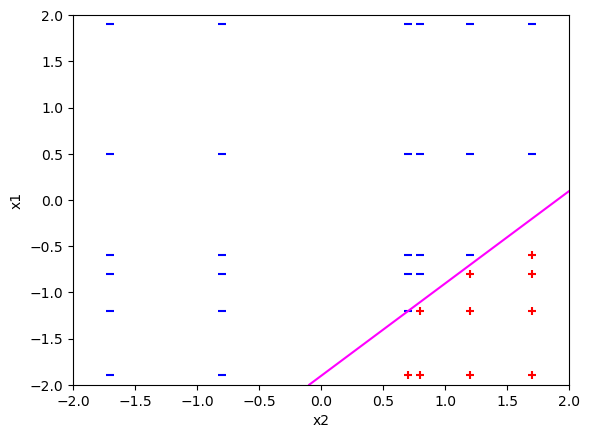

TypeError: list indices must be integers or slices, not tuple

In [193]:
if __name__ == '__main__':
    show_training(x_train,y_train,w,xlim=[-2,2],ylim=[-2,2])
    show_all_training(input_data=all_data["x"], output=all_data["y"],all_w=all_data["w"],xlim=[-2,2],ylim=[-2,2])
